In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ibm-hr-analytics-attrition-dataset


# **Milestone 1: Data Collection, Exploration, and Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
data =pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [ ]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


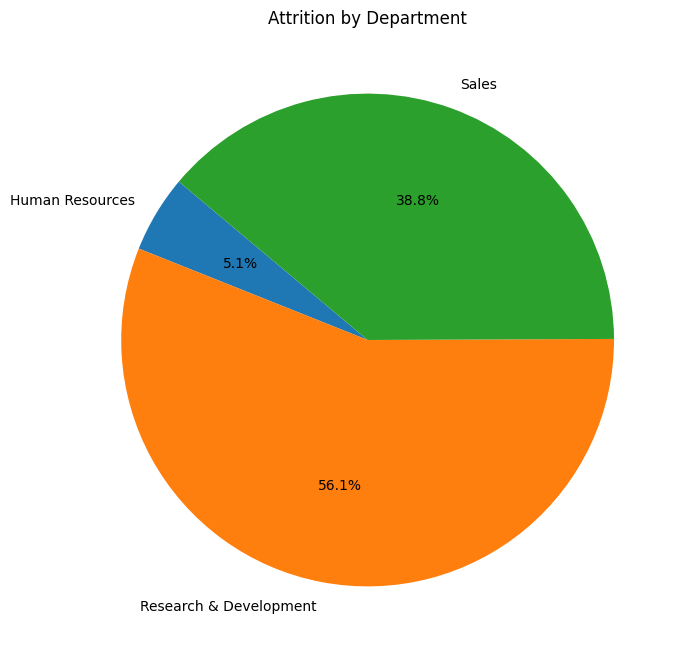

In [ ]:
# prompt: draw pie chart that show Department and its Attrition

import matplotlib.pyplot as plt
# Pie chart of Department and Attrition
attrition_by_department = data.groupby('Department')['Attrition'].apply(lambda x: (x=='Yes').sum()).reset_index(name='AttritionCount')
plt.figure(figsize=(8, 8))
plt.pie(attrition_by_department['AttritionCount'], labels=attrition_by_department['Department'], autopct='%1.1f%%', startangle=140)
plt.title('Attrition by Department')
plt.show()

In [ ]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
data.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
data['Attrition'].value_counts()

data['Attrition'].value_counts(normalize=True) * 100


,proportion
Attrition,
No,83.877551
Yes,16.122449


In [ ]:
# prompt: collect department

# Assuming 'data' DataFrame is already loaded as in the previous code.
department_counts = data['Department'].value_counts()
department_counts


,count
Department,
Research & Development,961
Sales,446
Human Resources,63


In [ ]:
# prompt: collect BusinessTravel

business_travel_counts = data['BusinessTravel'].value_counts()
business_travel_counts


,count
BusinessTravel,
Travel_Rarely,1043
Travel_Frequently,277
Non-Travel,150


In [ ]:
# prompt: collect EducationField

education_field_counts = data['EducationField'].value_counts()
education_field_counts


,count
EducationField,
Life Sciences,606
Medical,464
Marketing,159
Technical Degree,132
Other,82
Human Resources,27


In [ ]:
# prompt: collect BusinessTravel and department ,Agem	DailyRate

# Assuming 'data' DataFrame is already loaded as in the previous code.

# Collect BusinessTravel, Department, Age, and DailyRate
selected_columns = data[['BusinessTravel', 'Department', 'Age', 'DailyRate']]
selected_columns


,BusinessTravel,Department,Age,DailyRate
0,Travel_Rarely,Sales,41,1102
1,Travel_Frequently,Research & Development,49,279
2,Travel_Rarely,Research & Development,37,1373
3,Travel_Frequently,Research & Development,33,1392
4,Travel_Rarely,Research & Development,27,591
...,...,...,...,...
1465,Travel_Frequently,Research & Development,36,884
1466,Travel_Rarely,Research & Development,39,613
1467,Travel_Rarely,Research & Development,27,155
1468,Travel_Frequently,Sales,49,1023


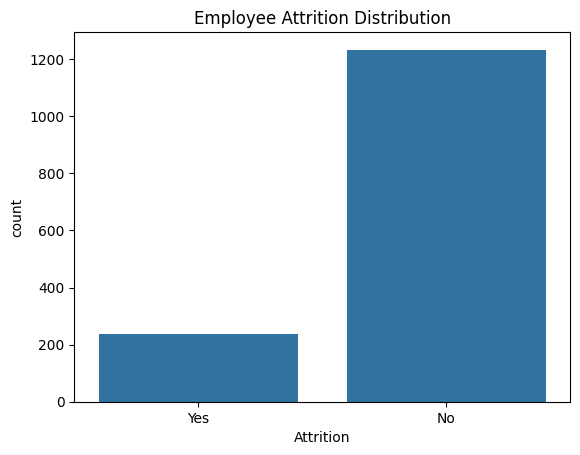

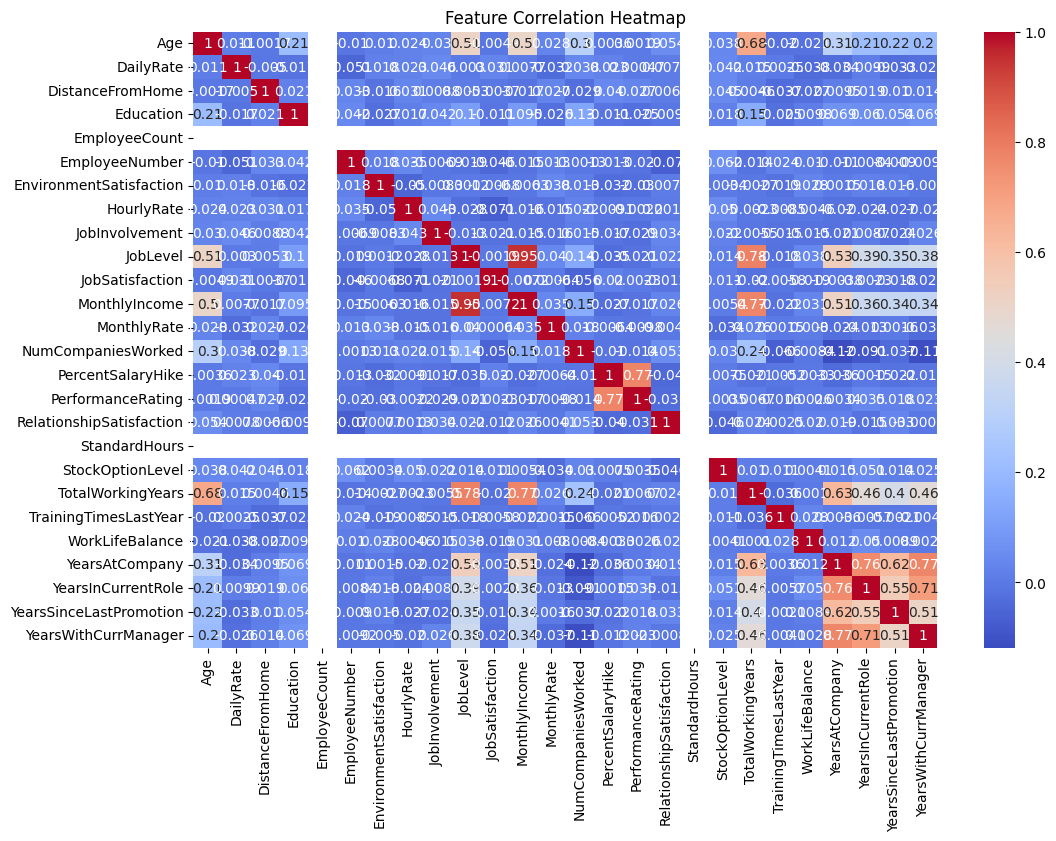

In [ ]:
# Countplot of Attrition
sns.countplot(x="Attrition", data=data) # Changed df to data
plt.title("Employee Attrition Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm") # Changed df to data
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Encode 'Attrition' column
label_enc = LabelEncoder()
# Changed df to data to use the existing DataFrame
data['Attrition'] = label_enc.fit_transform(data['Attrition'])  # Yes=1, No=0

# One-hot encoding for other categorical features
# Changed df to data to apply one-hot encoding to the existing DataFrame
data = pd.get_dummies(data, drop_first=True)

In [ ]:
# Select numerical columns to normalize
num_cols = ['Age', 'MonthlyIncome', 'YearsAtCompany']
scaler = StandardScaler()
# Change df to data to apply the scaler to the correct DataFrame
data[num_cols] = scaler.fit_transform(data[num_cols])

In [ ]:
# Tenure category
data['TenureCategory'] = pd.cut(data['YearsAtCompany'], bins=[0, 3, 7, 40], labels=['Short', 'Medium', 'Long'])

# Encode 'TenureCategory'
data = pd.get_dummies(data, columns=['TenureCategory'], drop_first=True)

# Salary to performance ratio
data['SalaryToPerformance'] = data['MonthlyIncome'] / data['PerformanceRating']

In [ ]:
# Save the preprocessed dataset
data.to_csv("cleaned_employee_data.csv", index=False)

# **Milestone 2: Advanced Data Analysis & Feature Engineering**

In [ ]:
import scipy.stats as stats
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [ ]:
def chi_squared_test(df, feature, target='Attrition'):
    """
    Performs a Chi-squared test for independence between a feature and the target variable.
    """
    # Ensure columns are categorical
    df[feature] = df[feature].astype('category')
    df[target] = df[target].astype('category')

    contingency_table = pd.crosstab(df[feature], df[target])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    # ... (rest of the function remains the same)

In [ ]:
# Compare income of employees who left vs stayed
# Use 'data' instead of 'df'
left = data[data['Attrition'] == 1]['MonthlyIncome']
stayed = data[data['Attrition'] == 0]['MonthlyIncome']
t_stat, p_val = stats.ttest_ind(left, stayed)
print(f"T-test p-value (MonthlyIncome vs Attrition): {p_val}")

T-test p-value (MonthlyIncome vs Attrition): 7.14736398535381e-10


In [ ]:
# Example: DistanceFromHome vs Attrition across multiple departments
# Use 'data' instead of 'df'
anova = stats.f_oneway(
    data[data['Attrition'] == 0]['DistanceFromHome'],
    data[data['Attrition'] == 1]['DistanceFromHome']
)
print(f"ANOVA p-value: {anova.pvalue}")

ANOVA p-value: 0.0027930600802132115


In [ ]:
# Use 'data' instead of 'df'
X = data.drop('Attrition', axis=1)
y = data['Attrition']

model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)

# Show selected features
selected_features = X.columns[fit.support_]
print("Top 10 Selected Features:")
print(selected_features)

Top 10 Selected Features:
Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate',
       'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany',
       'SalaryToPerformance'],
      dtype='object')


In [ ]:
# Create salary bands
# Use 'data' instead of 'df'
data['SalaryBand'] = pd.qcut(data['MonthlyIncome'], q=3, labels=["Low", "Medium", "High"])

# Encode the new feature
# Use 'data' instead of 'df'
data = pd.get_dummies(data, columns=['SalaryBand'], drop_first=True)

In [ ]:
# Interaction: EnvironmentSatisfaction * JobSatisfaction
# Use 'data' instead of 'df'
data['EnvJobSatisfaction'] = data['EnvironmentSatisfaction'] * data['JobSatisfaction']

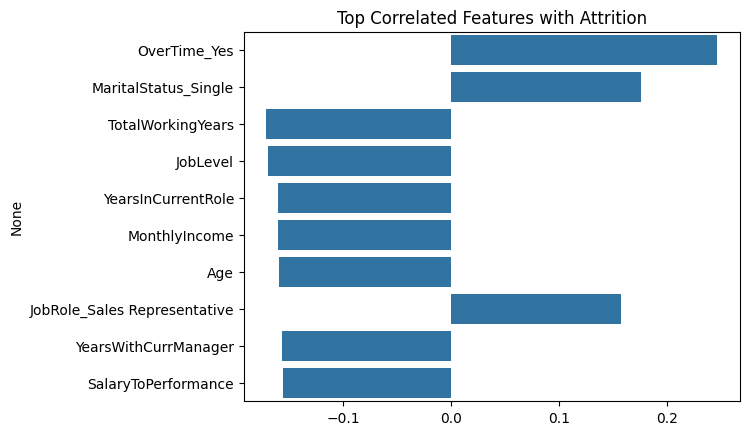

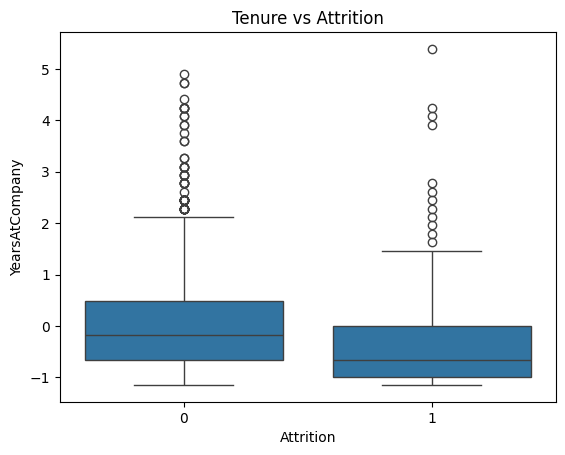

In [ ]:
# Heatmap for high correlation features with attrition
import numpy as np

# Use 'data' instead of 'df' for all occurrences in this cell
corr_matrix = data.corr(numeric_only=True)
attr_corr = corr_matrix["Attrition"].sort_values(key=np.abs, ascending=False)
sns.barplot(x=attr_corr.values[1:11], y=attr_corr.index[1:11])
plt.title("Top Correlated Features with Attrition")
plt.show()

# Boxplot of Tenure vs Attrition
sns.boxplot(x='Attrition', y='YearsAtCompany', data=data)
plt.title("Tenure vs Attrition")
plt.show()

# **Milestone 3: Machine Learning Model Development and Optimization**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       247
           1       0.48      0.51      0.49        47

    accuracy                           0.83       294
   macro avg       0.69      0.70      0.70       294
weighted avg       0.84      0.83      0.84       294

Confusion Matrix:
[[221  26]
 [ 23  24]]
ROC AUC Score: 0.7027

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       247
           1       0.54      0.30      0.38        47

    accuracy                           0.85       294
   macro avg       0.71      0.62      0.65       294
weighted avg       0.82      0.85      0.83       294

Confusion Matrix:
[[235  12]
 [ 33  14]]
ROC AUC Score: 0.6246

Gradient Boosting Evaluation:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       247
           1       0

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:47:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Evaluation:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       247
           1       0.81      0.47      0.59        47

    accuracy                           0.90       294
   macro avg       0.86      0.72      0.77       294
weighted avg       0.89      0.90      0.89       294

Confusion Matrix:
[[242   5]
 [ 25  22]]
ROC AUC Score: 0.7239
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

Final Model Evaluation (Random Forest):
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       247
           1       0.65      0.36      0.47        47

    accuracy                           0.87       294
   macro avg       0.77      0.66      0.70       294
weighted avg       0.85      0.87      0.85       294

Confusion Matrix:


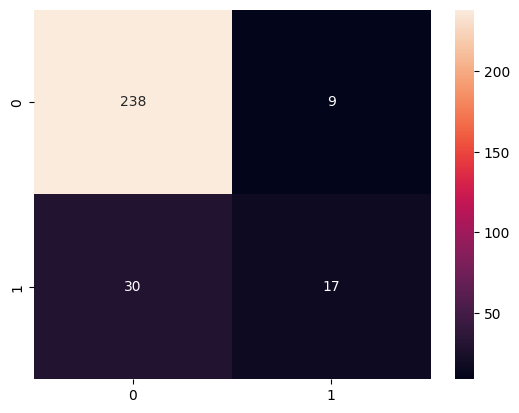

ROC AUC Score: 0.6626


['final_attrition_model.pkl']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset - Load it into 'data' to maintain consistency
data = pd.read_csv("cleaned_employee_data.csv")

# Define X and y
# Use 'data' instead of 'df'
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# The rest of the Milestone 3 cells will also need 'df' replaced with 'data'.
# For example, in the cells involving SMOTE, model training, and evaluation:

# from imblearn.over_sampling import SMOTE # Already imported above

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    print(f"\n{name} Evaluation:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred):.4f}")

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train_resampled, y_train_resampled)

print("Best Parameters:", grid.best_params_)
best_rf = grid.best_estimator_

y_pred = best_rf.predict(X_test)
print("\nFinal Model Evaluation (Random Forest):")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred):.4f}")

import joblib
joblib.dump(best_rf, "final_attrition_model.pkl")

In [ ]:
# Load cleaned dataset
df = pd.read_csv("cleaned_employee_data.csv")

# Define X and y
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    print(f"\n{name} Evaluation:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred):.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       247
           1       0.48      0.51      0.49        47

    accuracy                           0.83       294
   macro avg       0.69      0.70      0.70       294
weighted avg       0.84      0.83      0.84       294

Confusion Matrix:
[[221  26]
 [ 23  24]]
ROC AUC Score: 0.7027

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       247
           1       0.63      0.36      0.46        47

    accuracy                           0.86       294
   macro avg       0.76      0.66      0.69       294
weighted avg       0.85      0.86      0.85       294

Confusion Matrix:
[[237  10]
 [ 30  17]]
ROC AUC Score: 0.6606

Gradient Boosting Evaluation:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       247
           1       0

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:48:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train_resampled, y_train_resampled)

print("Best Parameters:", grid.best_params_)
best_rf = grid.best_estimator_


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}



Final Model Evaluation (Random Forest):
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.68      0.36      0.47        47

    accuracy                           0.87       294
   macro avg       0.78      0.66      0.70       294
weighted avg       0.86      0.87      0.85       294

Confusion Matrix:


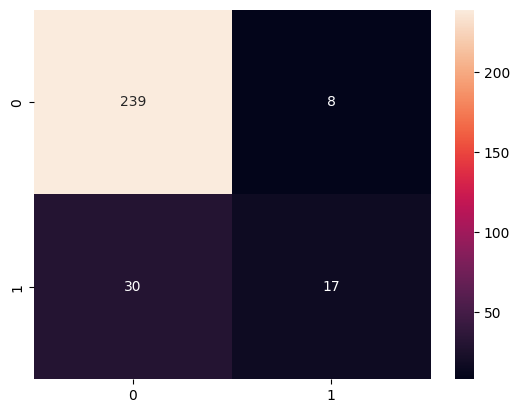

ROC AUC Score: 0.6647


In [ ]:
y_pred = best_rf.predict(X_test)
print("\nFinal Model Evaluation (Random Forest):")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred):.4f}")


In [ ]:
import joblib
joblib.dump(best_rf, "final_attrition_model.pkl")


['final_attrition_model.pkl']

# **Milestone 4: MLOps, Deployment, and Monitoring**

In [ ]:
pip install mlflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.2/700.2 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6

In [ ]:
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature

# Suppose X_test is your test input and y_pred is prediction
input_example = X_test.iloc[:1]
signature = infer_signature(X_test, model.predict(X_test))

# Log model with input example and signature
with mlflow.start_run():
    mlflow.sklearn.log_model(model, "employee_attrition_model",
                             input_example=input_example,
                             signature=signature)


/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from IPython.display import display

# Example
for col in df.columns[:5]:
    print(f"Summary of {col}")
    display(df[col].describe())

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for col in numeric_columns:
    df[col].hist()
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)  # Add x-axis label
    plt.ylabel("Frequency") # Add y-axis label
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

for col in numeric_columns:
    df[col].hist()
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)  # Add x-axis label
    plt.ylabel("Frequency") # Add y-axis label
    plt.show()

In [ ]:
from IPython.display import HTML

styled_df = df.head().style.set_caption("Sample Preview")
display(styled_df)

In [ ]:
# prompt: add all to dashboard

import matplotlib.pyplot as plt
import numpy as np
# Dashboard elements for numerical column summaries
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for col in numeric_columns:
    print(f"## Summary of {col}")
    display(df[col].describe())

# Dashboard elements for histograms of numerical columns
for col in numeric_columns:
    print(f"## Histogram of {col}")
    df[col].hist()
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Dashboard element for sample preview
print("## Sample Preview")
styled_df = df.head().style.set_caption("Sample Preview")
display(styled_df)

# Dashboard element for Attrition distribution
print("## Employee Attrition Distribution")
sns.countplot(x="Attrition", data=df)
plt.title("Employee Attrition Distribution")
plt.show()

# Dashboard element for Feature Correlation Heatmap
print("## Feature Correlation Heatmap")
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Dashboard element for Top Correlated Features with Attrition
print("## Top Correlated Features with Attrition")
corr_matrix = df.corr(numeric_only=True)
attr_corr = corr_matrix["Attrition"].sort_values(key=np.abs, ascending=False)
sns.barplot(x=attr_corr.values[1:11], y=attr_corr.index[1:11])
plt.title("Top Correlated Features with Attrition")
plt.show()

# Dashboard element for Tenure vs Attrition Boxplot
print("## Tenure vs Attrition")
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title("Tenure vs Attrition")
plt.show()

# Dashboard element for Final Model Evaluation (Random Forest)
print("## Final Model Evaluation (Random Forest)")
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred):.4f}")
